<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 20 Class 2 02/09</h1>
</div>

## Objectives for this week:
* Linear Regressions

## Todays Agenda
* Introduction to Machine Learning
* Linear Regressions





<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Homework Problem</h1>
</div>

# Exercise 2

Given an array of distinct integers arr, where arr is sorted in ascending order, return the smallest index i that satisfies arr[i] == i. If there is no such index, return -1.

**Example 1:**

`Input`: arr = [-10,-5,0,3,7]  
`Output`: 3  
Explanation: For the given array, arr[0] = -10, arr[1] = -5, arr[2] = 0, arr[3] = 3, thus the output is 3.  

**Example 2:**

`Input`: arr = [0,2,5,8,17]  
`Output`: 0  
Explanation: arr[0] = 0, thus the output is 0.  

**Example 3:**

`Input`: arr = [-10,-5,3,4,7,9]  
`Output`: -1  
Explanation: There is no such i that arr[i] == i, thus the output is -1.  

In [ ]:
%%timeit
def ex2(arr):
    for i,j in enumerate(arr):
        if i == j:
            return i
    return -1
        
ex2([-10,-5,0,3,7])
ex2([0,2,5,8,17])
ex2([-10,-5,3,4,7,9])

In [ ]:
%%timeit
def ex2(arr):
    i = 0
    for j in arr:
        if i == j:return i
        i += 1
    return -1
        
ex2([-10,-5,0,3,7])
ex2([0,2,5,8,17])
ex2([-10,-5,3,4,7,9])

In [ ]:
%%timeit
def ex2(arr):
    i, l = 0, len(arr)
    while i < l:
        if i == arr[i]: return i
        i += 1
    return -1

ex2([-10,-5,0,3,7])
ex2([0,2,5,8,17])
ex2([-10,-5,3,4,7,9])

In [ ]:
try:
    assert(ex2([-10,-5,0,3,7]) == 3)
    assert(ex2([0,2,5,8,17]) == 0)
    assert(ex2([-10,-5,3,4,7,9]) == -1)
    print("solution is correct")
except AssertionError:
    print("solution is incorrect")

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Algorithms</h1>
</div>  


### Algorithms you should know:  
* Arrays
* Queues
* Linked Lists
* Stacks
* Binary Search

# Binary Trees
In computer science, a binary tree is a tree data structure in which each node has at most two children, which are referred to as the left child and the right child. 

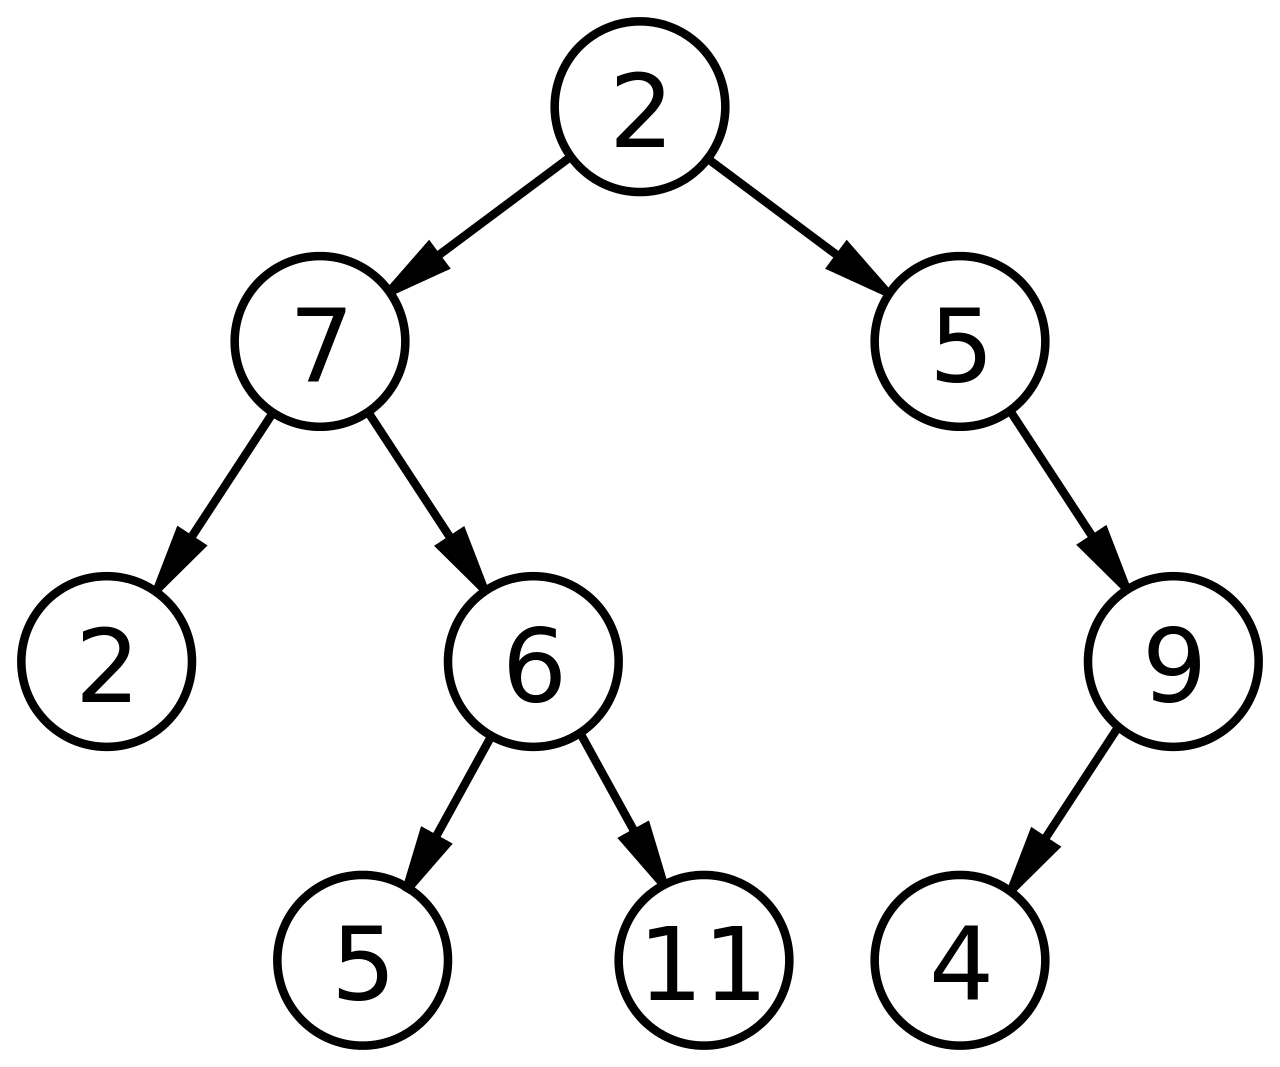

Some notes:
* Binary trees always have a root
* A **full** binary tree is a tree in which every node has either 0 or 2 children.
* A **complete** binary tree is one where in every level, excluding the last, each node has 2 children and in the last level, all nodes are as far left as possible
* A **perfect** binary tree is one where all interior nodes have two children and all leaves have the same depth (similar to a family tree).  
A full binary tree:  

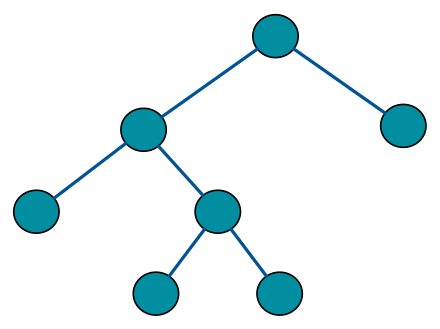  

A complete binary tree:  
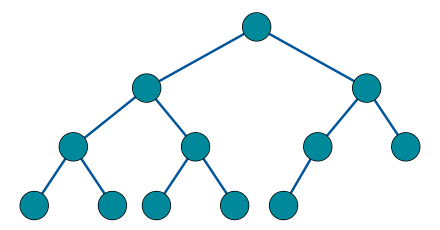  


In [2]:
class BinaryTree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
        
    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = BinaryTree(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = BinaryTree(data)
                else:
                    self.right.insert(data)
        else:
            self.data = data
            
    def print(self):
        if self.left:
            self.left.print()
        print(self.data)
        if self.right:
            self.right.print()
            
tree = BinaryTree(12)
tree.insert(6)
tree.insert(2) #on left of 6
tree.insert(3)  #on left of 6
tree.insert(8)  #to the right of 6
tree.insert(7)  #to the righ tof 6
tree.insert(9)
tree.insert(15) #the right values
tree.insert(20)  #the right values

tree.print()
#we get a sorted list when we print

2
3
6
7
8
9
12
15
20


### Where it's used: Huffman Coding 

a method for lossless compression that takes a string of data, assigns values to each node of the tree, adds those vlaues to a binary tree, and then uses the tree to form a smaller binary string of the data.
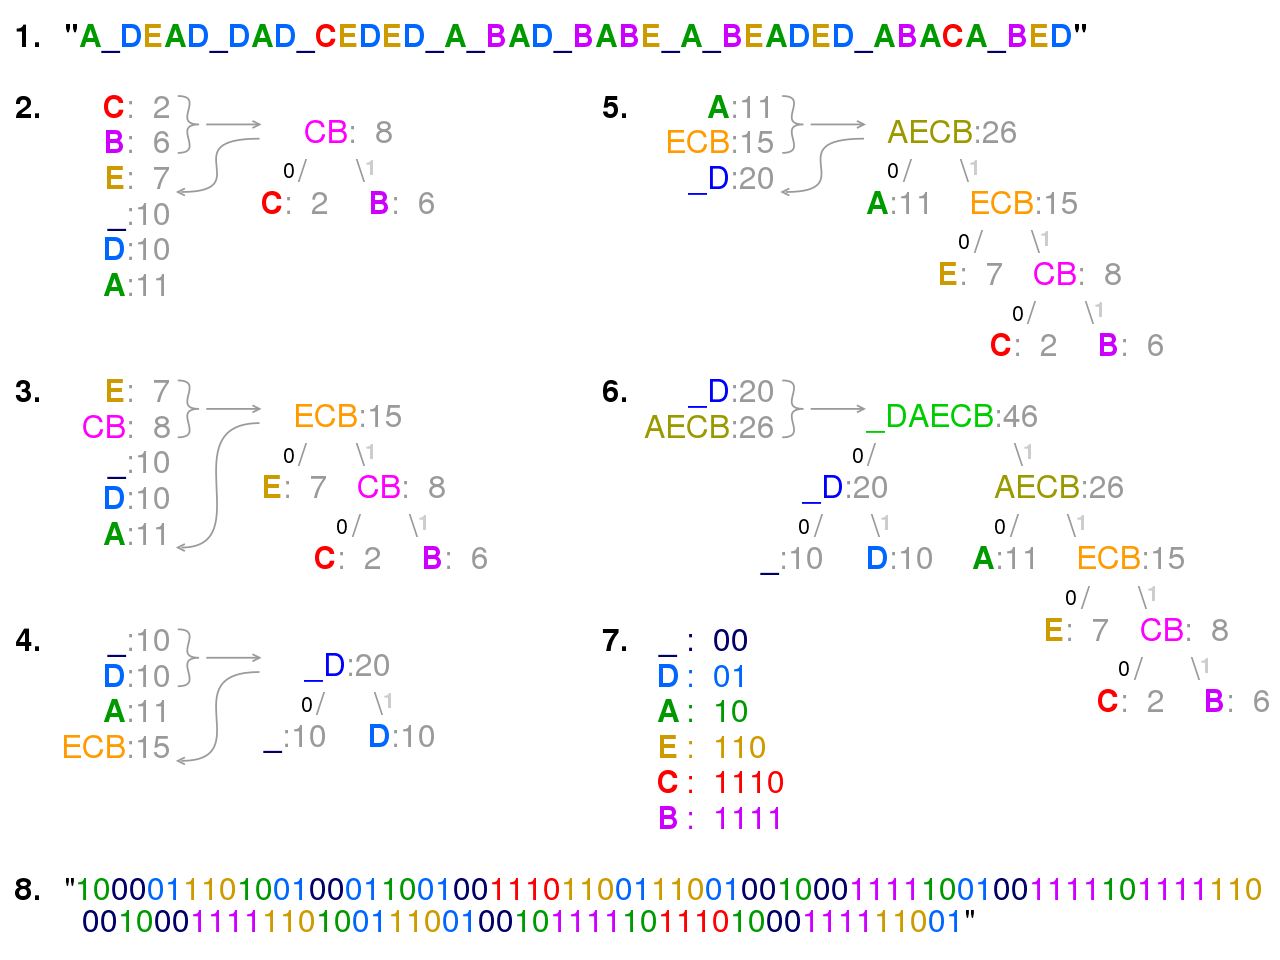

<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Supervised Learning: Linear Regression</h1>
</div>

**Note** For today's class we'll need scikit-learn

In [ ]:
# use this if you installed your python packages with pip
!pip install scikit-learn/

In [6]:
# use this if you installed your python packages with conda
!conda install scikit-learn

Solving environment: ...working... done

# All requested packages already installed.



### Linear Regression Intuition

Let’s say, I give you the following puzzle:

Given the following values of X and Y, what is the value of Y when X = 5.
```
(1,1), (2,2), (4,4), (100,100), (20, 20)
```
The answer is : 5. Not very difficult, right?

Now, let’s take a look at different example. Say you have the following pairs of X and Y. Can you calculate the value of Y, when X = 5?
```
(1,1), (2,4), (4,16), (100,10000), (20, 400)
```
The answer is : 25. Was it difficult?

Let’s understand a bit as to what happened in the above examples.

When we look at the first example, after looking at the given pairs, one can establish that the relationship between X and Y is Y = X.

Similarly, in the second example, the relationship is Y = X*X.

In these two examples, we can determine the relationship between two given variables (X and Y) because we could easily identify the relationship between them. Overall, machine learning works in the same way.

Your computer looks at some examples and then tries to identify “the most suitable” relationship between the sets X and Y. Using this identified relationship, it will try to predict (or more) for new examples for which you don’t know Y.

The following is excepted from [here](https://github.com/learn-co-students/dsc-simple-linear-regression-nyc-ds-082619)

# About Regression analysis

Regression analysis is one of the most important statistical techniques for business applications. It’s a statistical methodology that helps estimate the strength and direction of the relationship between two (or more) variables. Regression results show whether the relationship is valid or not. It also helps to predict an unknown value based on the derived relationship.

"Regression Analysis is a parametric technique meaning a set of parameters are used to predict the value of an unknown target variable (or dependent variable) $y$ based on one or more of known input features (or independent variables, predictors), often denoted by $x$."

Let's consider another example. Someone's height and foot size are generally considered to be related. Generally speaking, taller people tend to have bigger feet (and, obviously, shoe size).

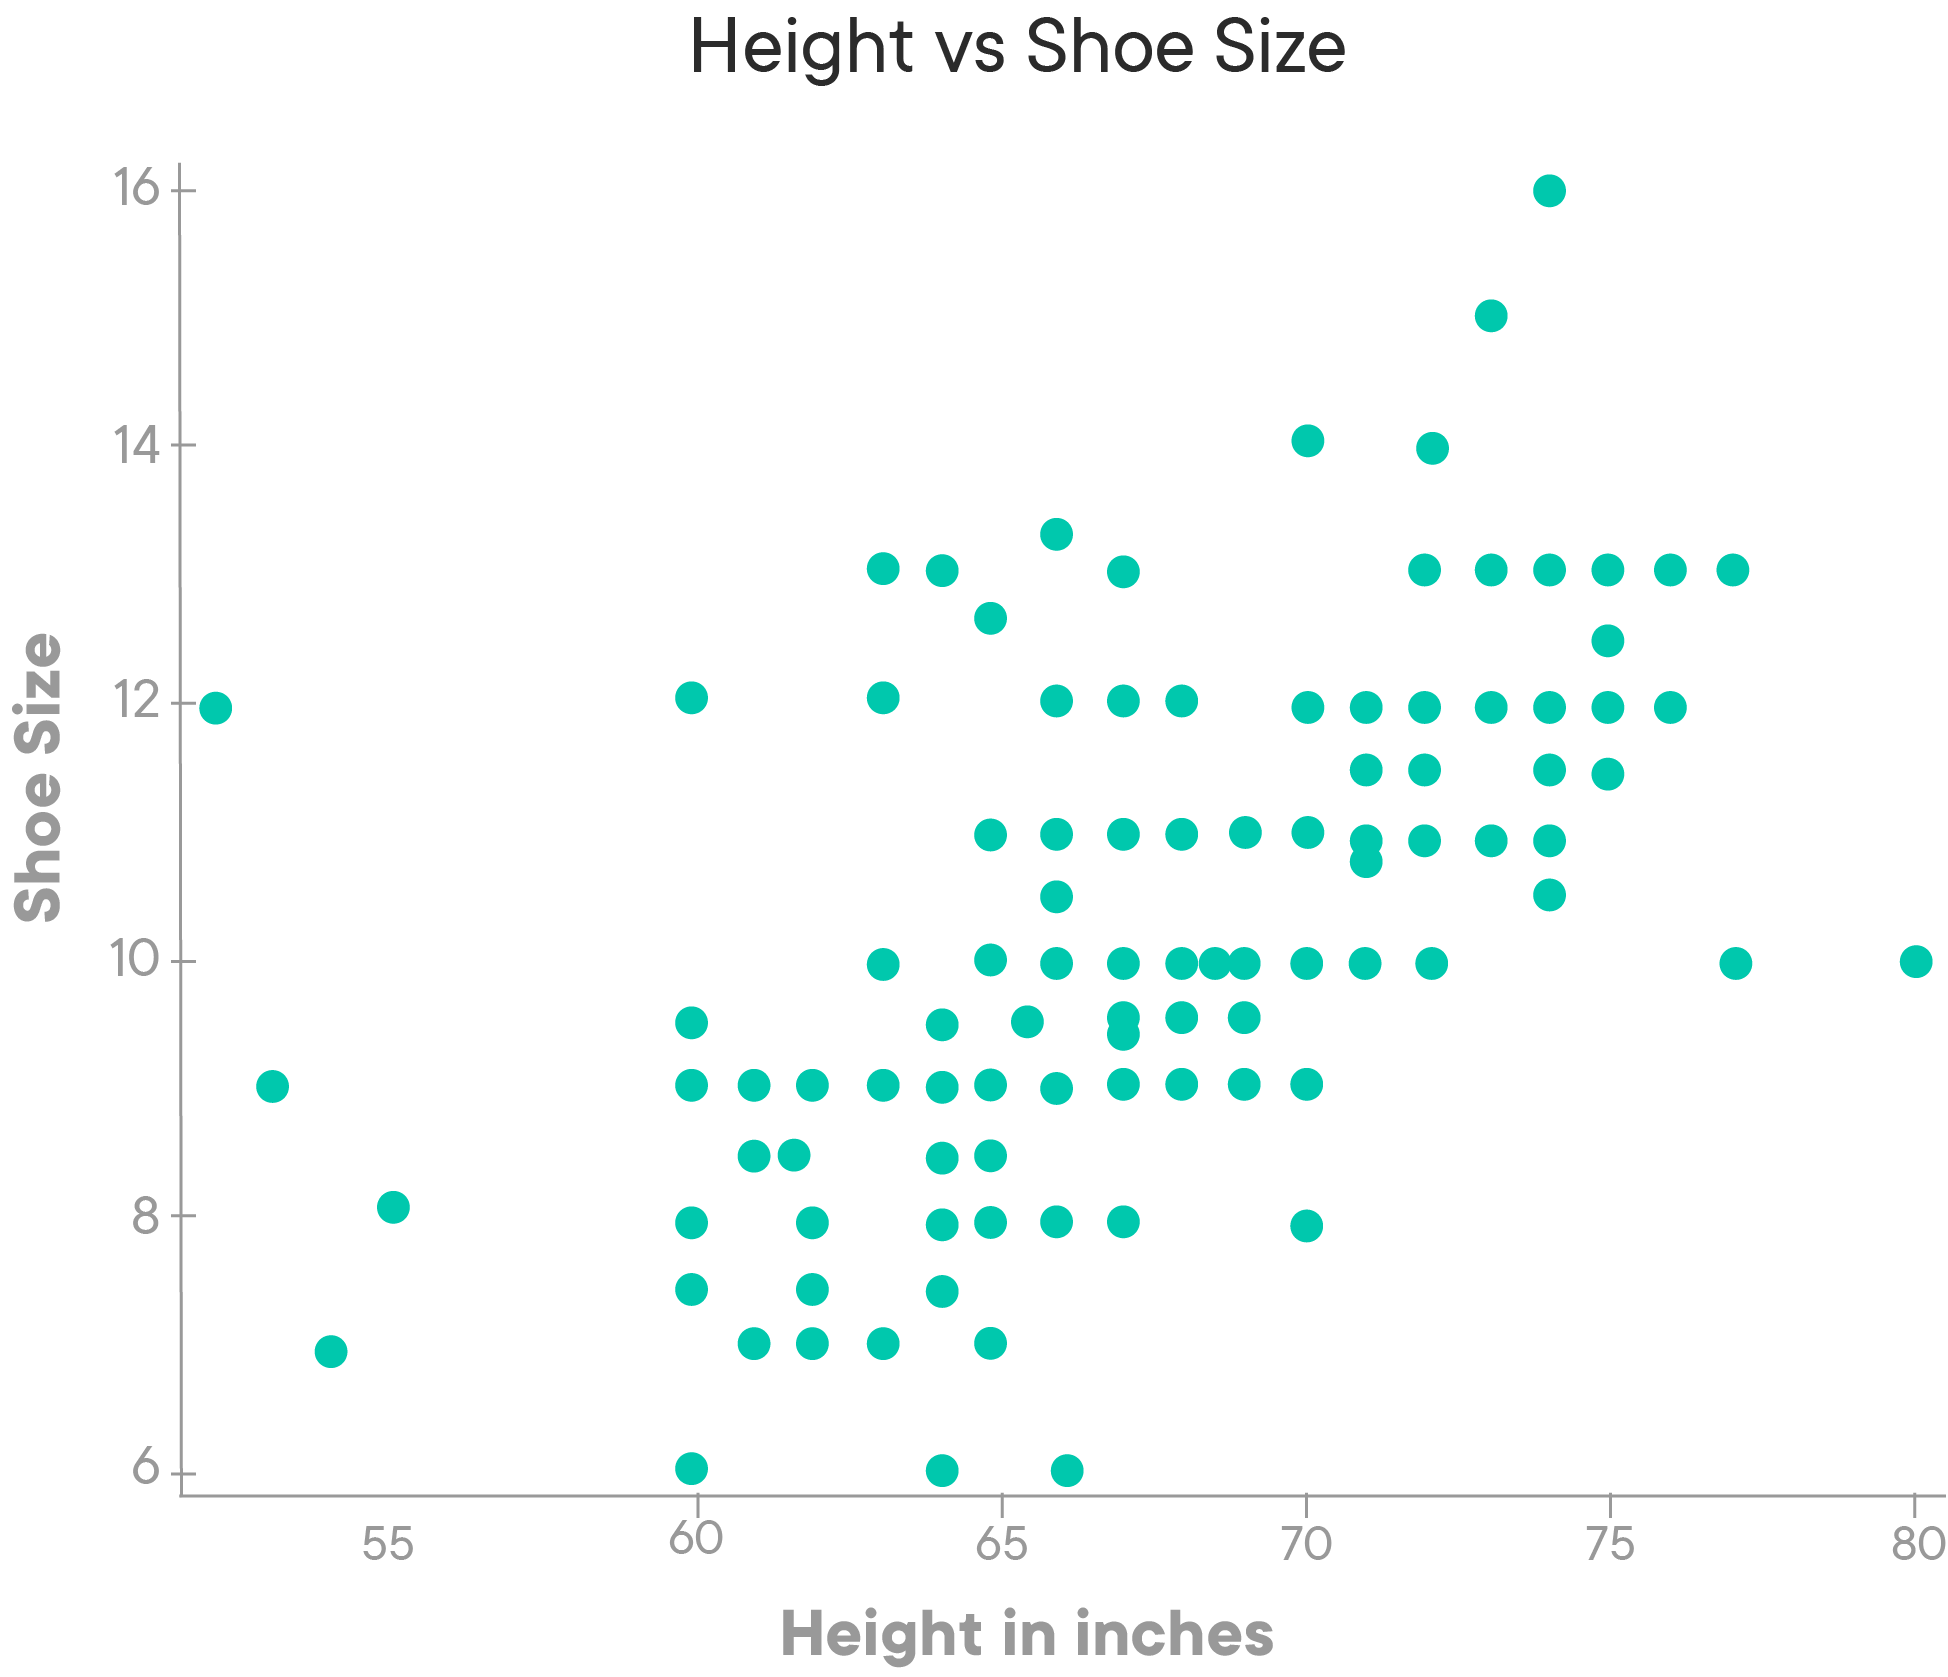

We can use a linear regression analysis here to predict foot size (dependent variable), given height (independent variable) of an individual. Regression is proven to give credible results if the data follows some assumptions which will be covered in upcoming lessons in detail. In general, regression analysis helps us in the following ways:

1. Finding an **association** or relationship between certain phenomena or variables
2. Identifying **which variables contribute** more towards the outcomes
3. **Prediction** of future observations

### Why "linear" regression?

The term **linear** implies that the model functions along with a straight (or nearly straight) line. Linearity, one of the assumptions of this approach, suggests that the relationship between dependent and independent variables can be expressed as a straight line.

**Simple Linear Regression** uses a single feature (one independent variable) to model a linear relationship with a target (the dependent variable) by fitting an optimal model (i.e. the best straight line) to describe this relationship.

**Multiple Linear Regression** uses more than one feature to predict a target variable by fitting the best linear relationship.

In this section, we will mainly focus on simple regression to build a sound understanding. For the example shown above i.e. height vs foot size, a simple linear regression model would fit a line to the data points as follows:

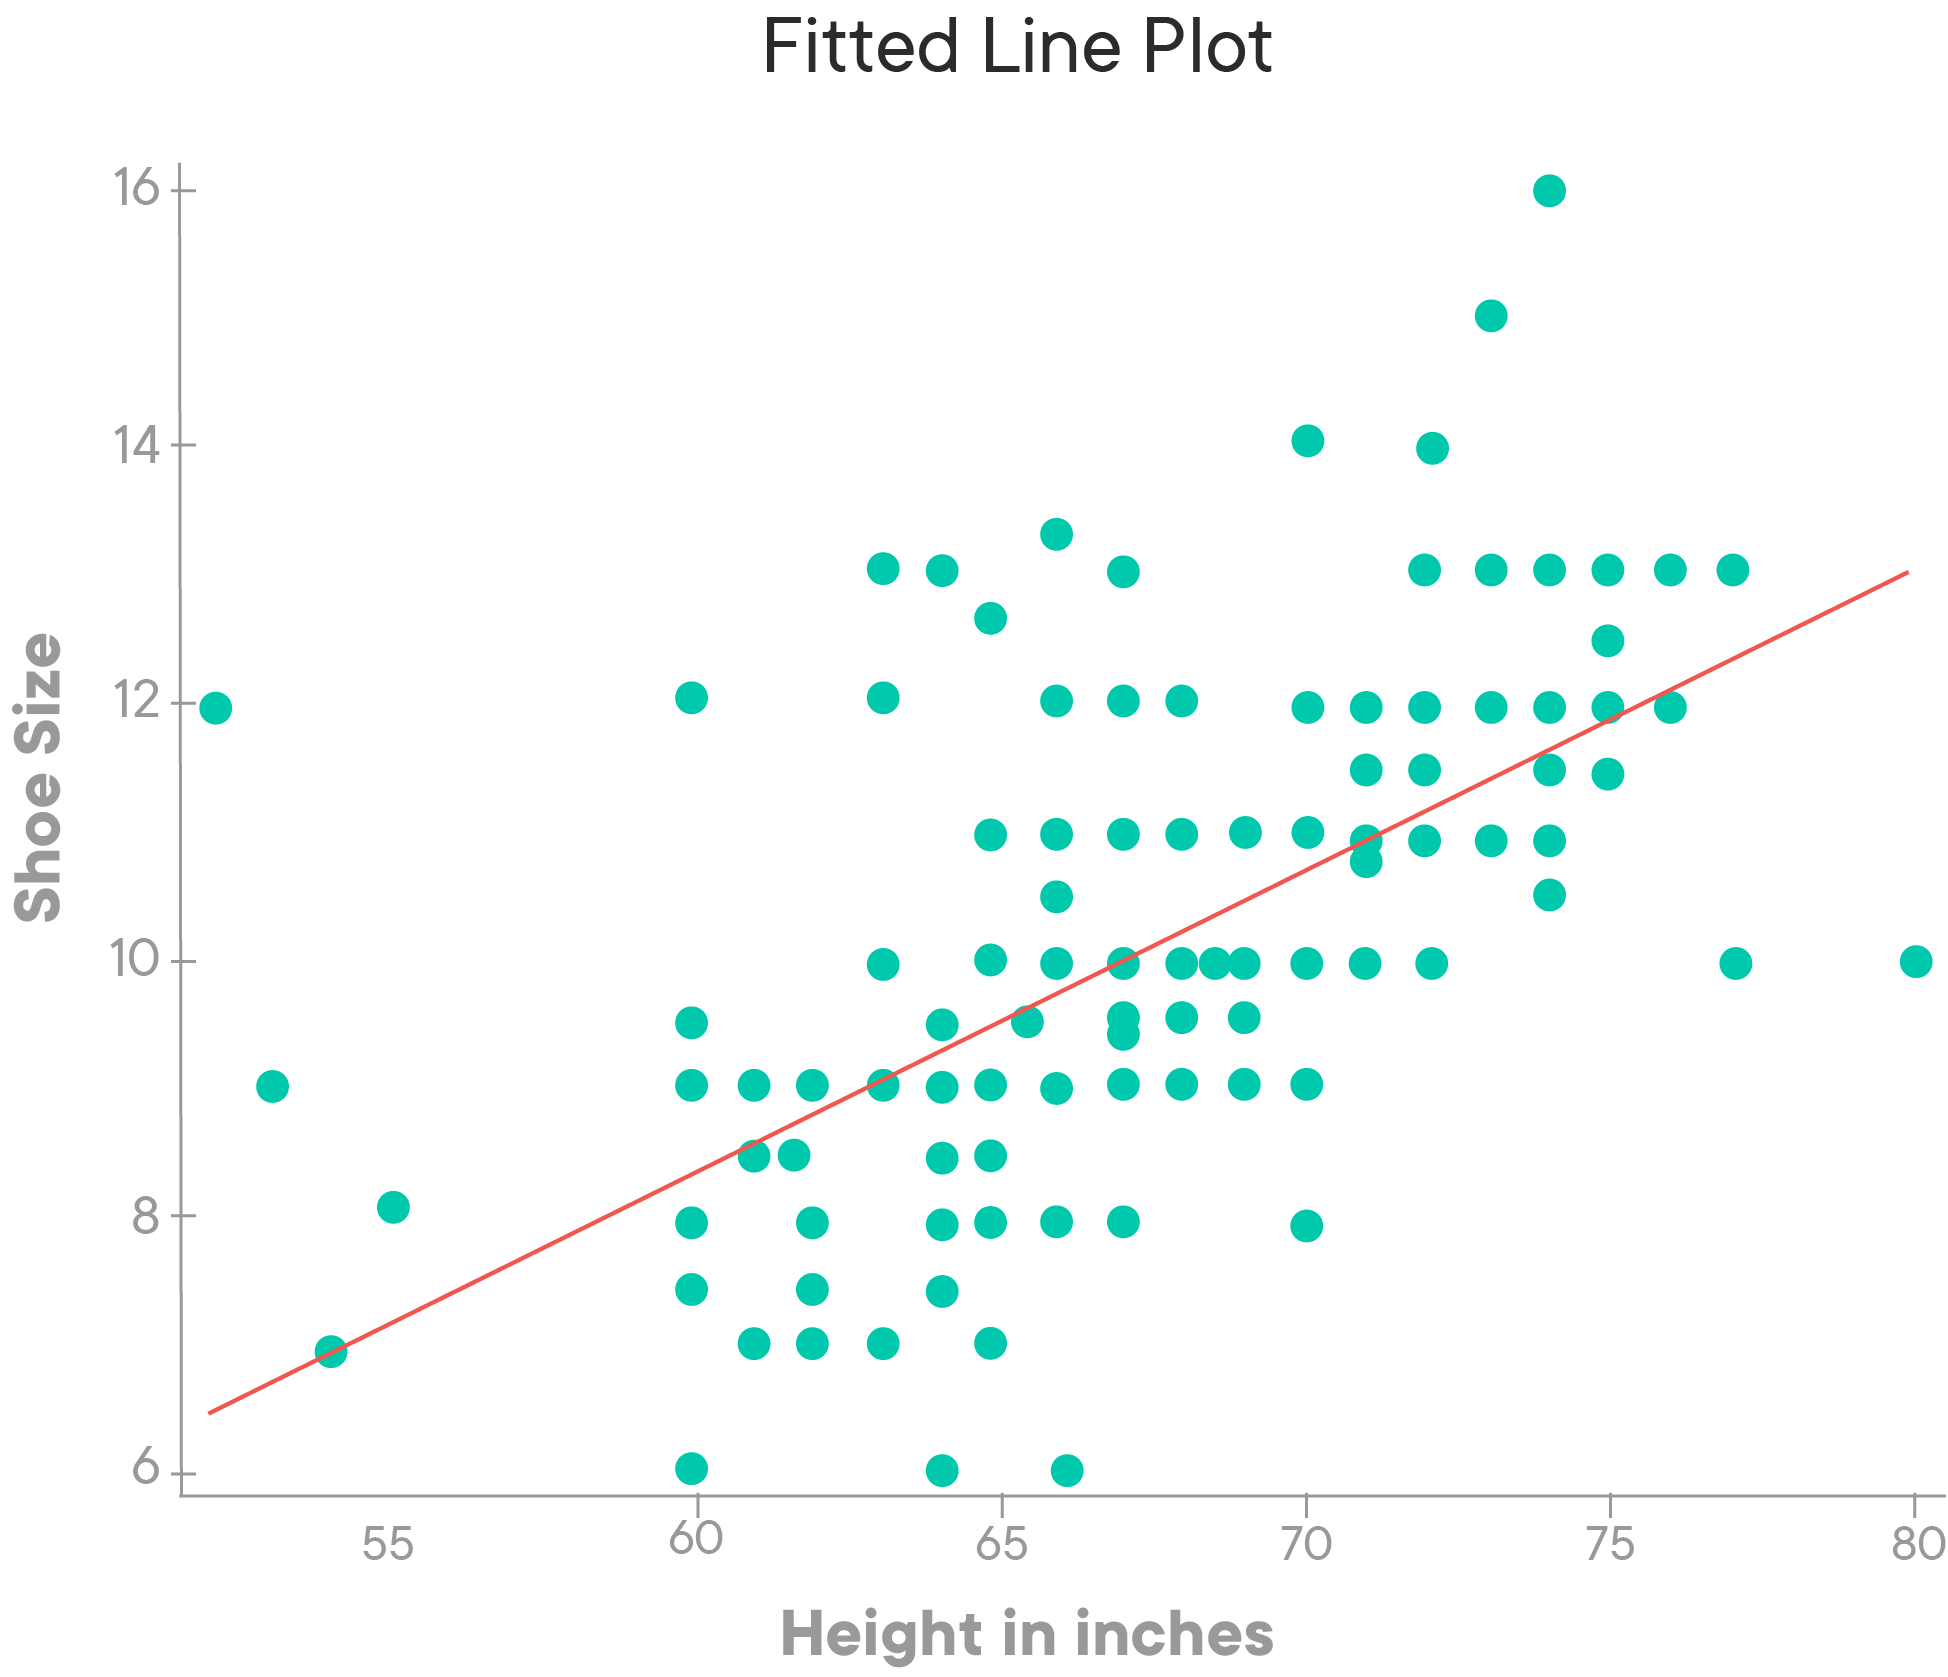

This line can then be used to describe the data and conduct further experiments using this fitted model. So let's move on and see how to calculate this "best-fit line" in a simple linear regression context.

### Calculating Regression Coefficients: Slope and Intercepts

A straight line can be written as :

$$y=mx+c$$ or, alternatively

$$y = \beta_0+ \beta_1 x $$

You may come across other ways of expressing this straight line equation for simple linear regression. Yet there are **four key components** you'll want to keep in mind:

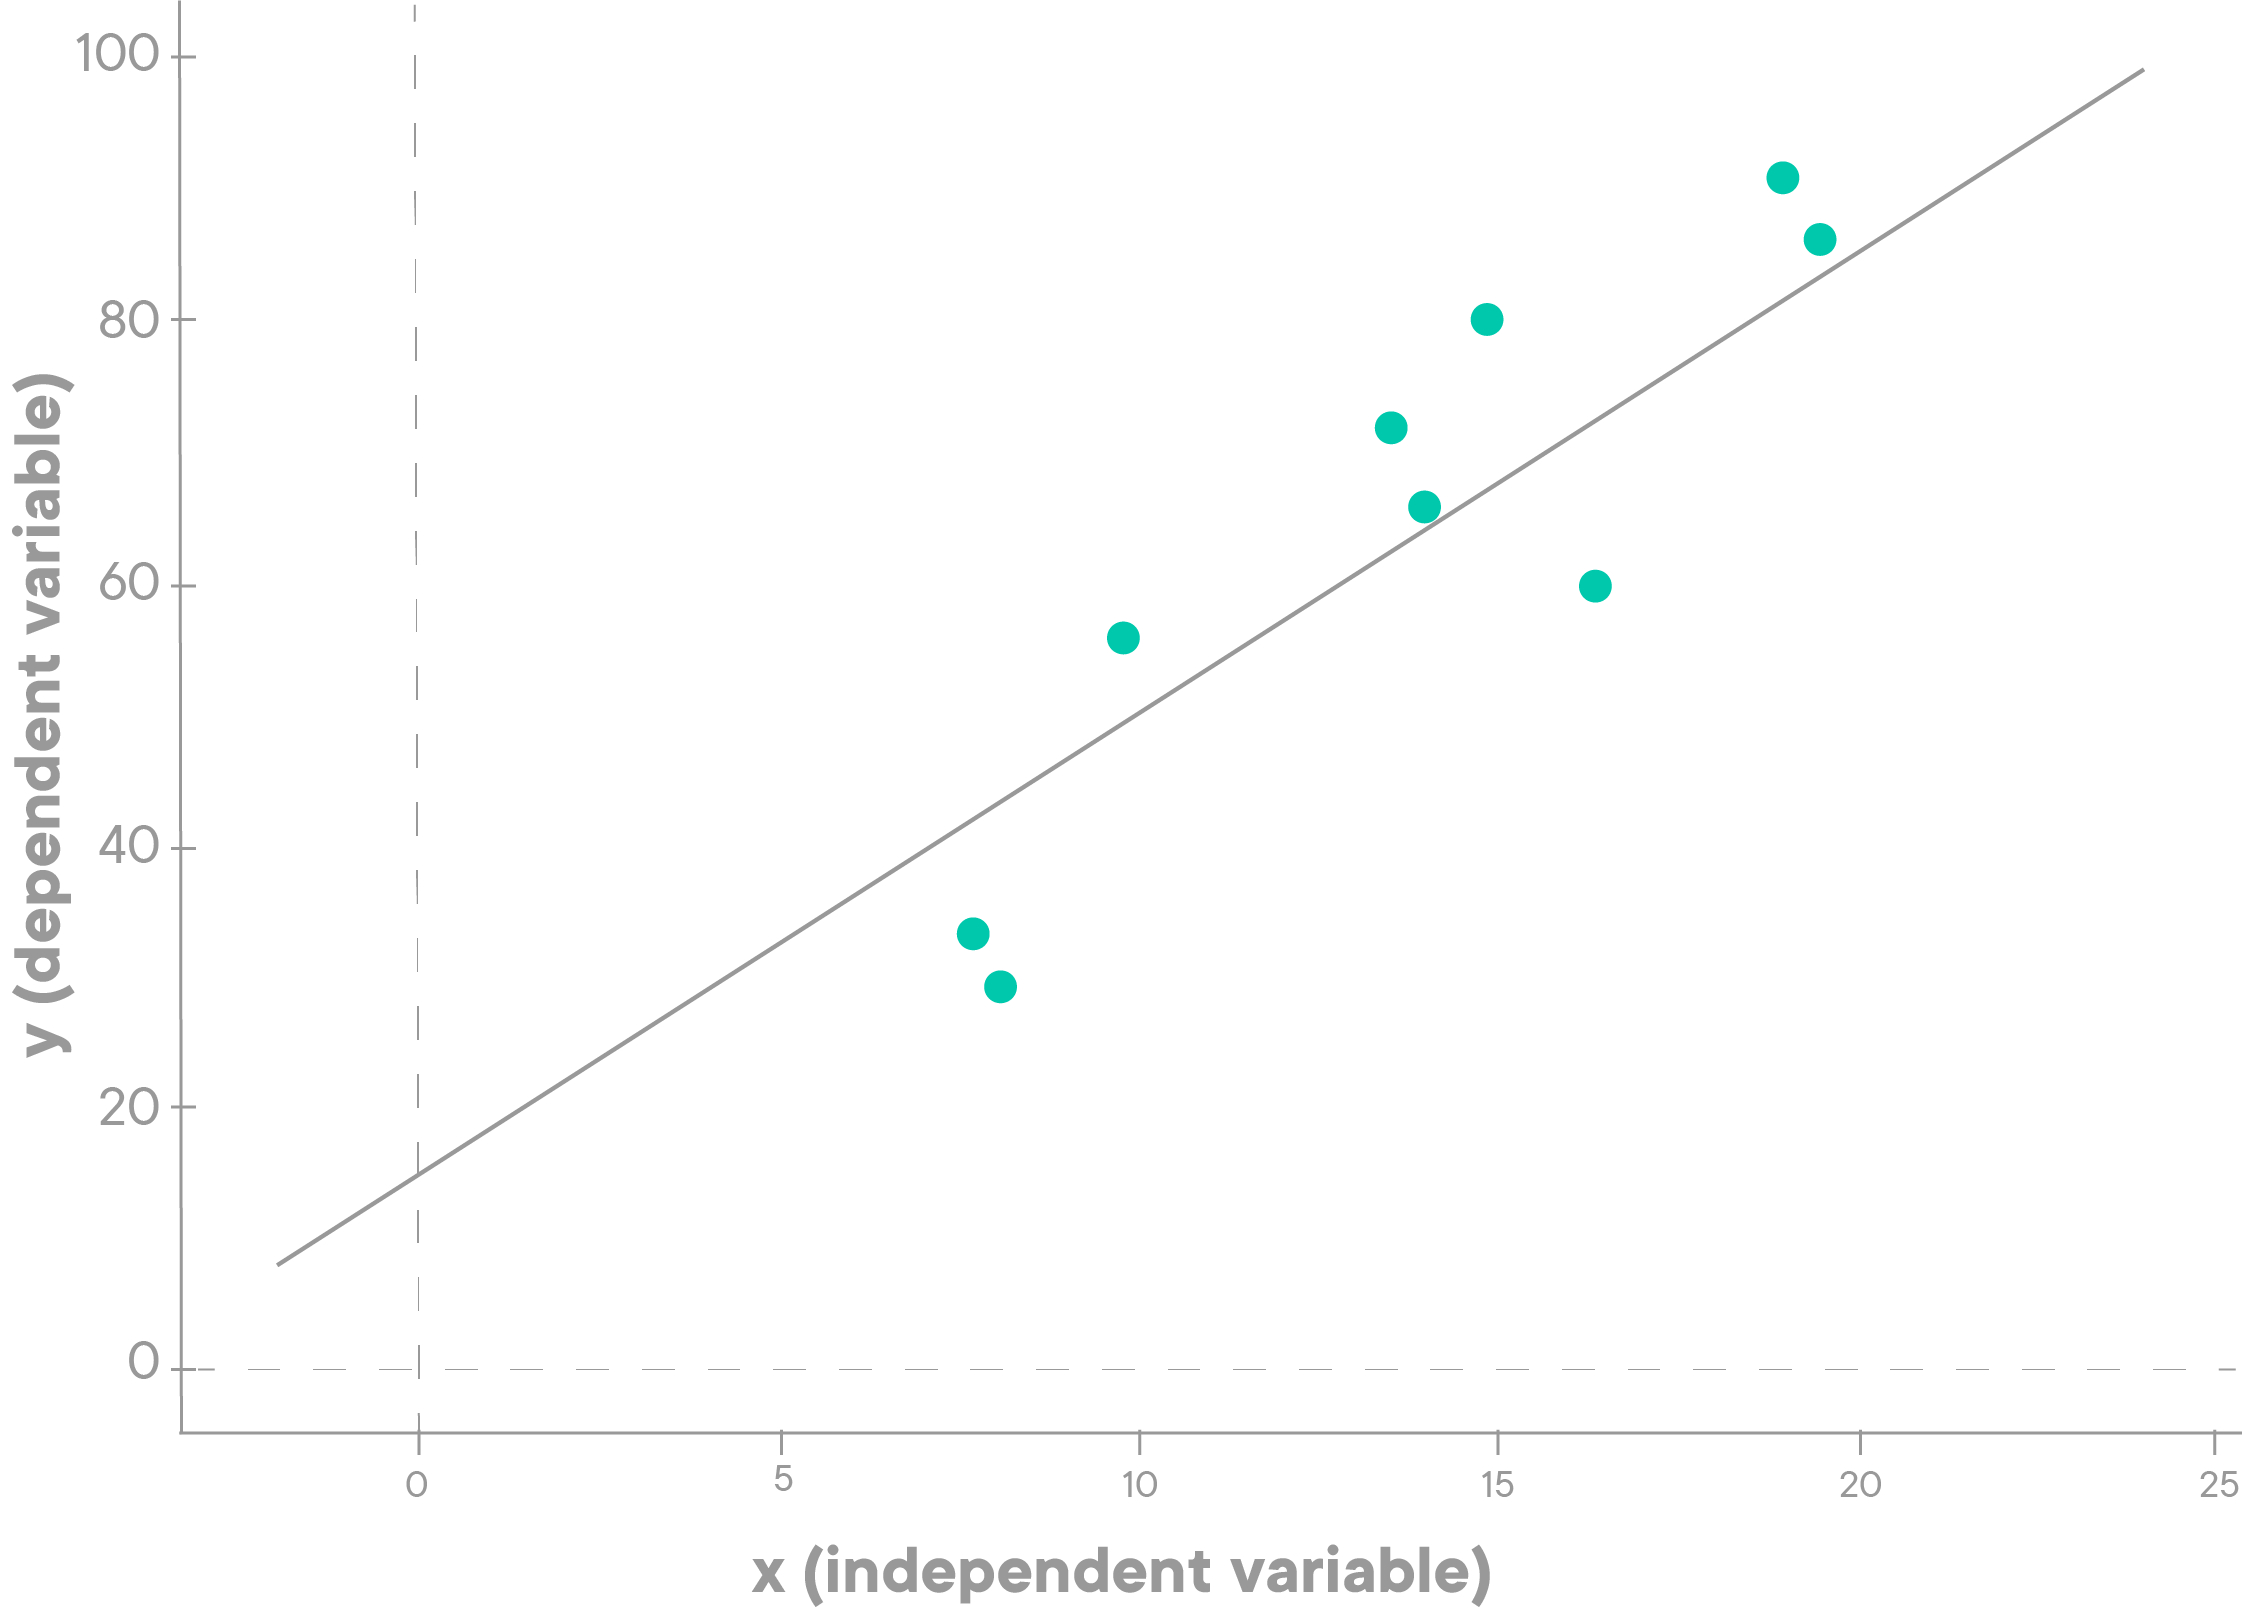
* A **dependent variable** that needs to estimated and predicted (here: $y$)
* An **independent variable**, the input variable (here: $x$)
* The **slope** which determines the angle of the line. Here, the slope is denoted as $m$, or $\beta_1$.
* The **intercept** which is the constant determining the value of $y$ when $x$ is 0. We denoted the intercept here as $c$ or $\beta_0$.

*Slope and Intercept are the coefficients or the parameters of a linear regression model. Calculating the regression model simply involves the calculation of these two values.*

**Linear regression is simply a manifestation of this simple equation!** So this is as complicated as our linear regression model gets. The equation here is the same one used to find a line in algebra, but in statistics, the actual data points don't necessarily lie on a line!

*The real challenge for regression analysis is to fit a line, out of an infinite number of lines that best describes the data.*

Consider the line below to see how we calculate slope and intercept.

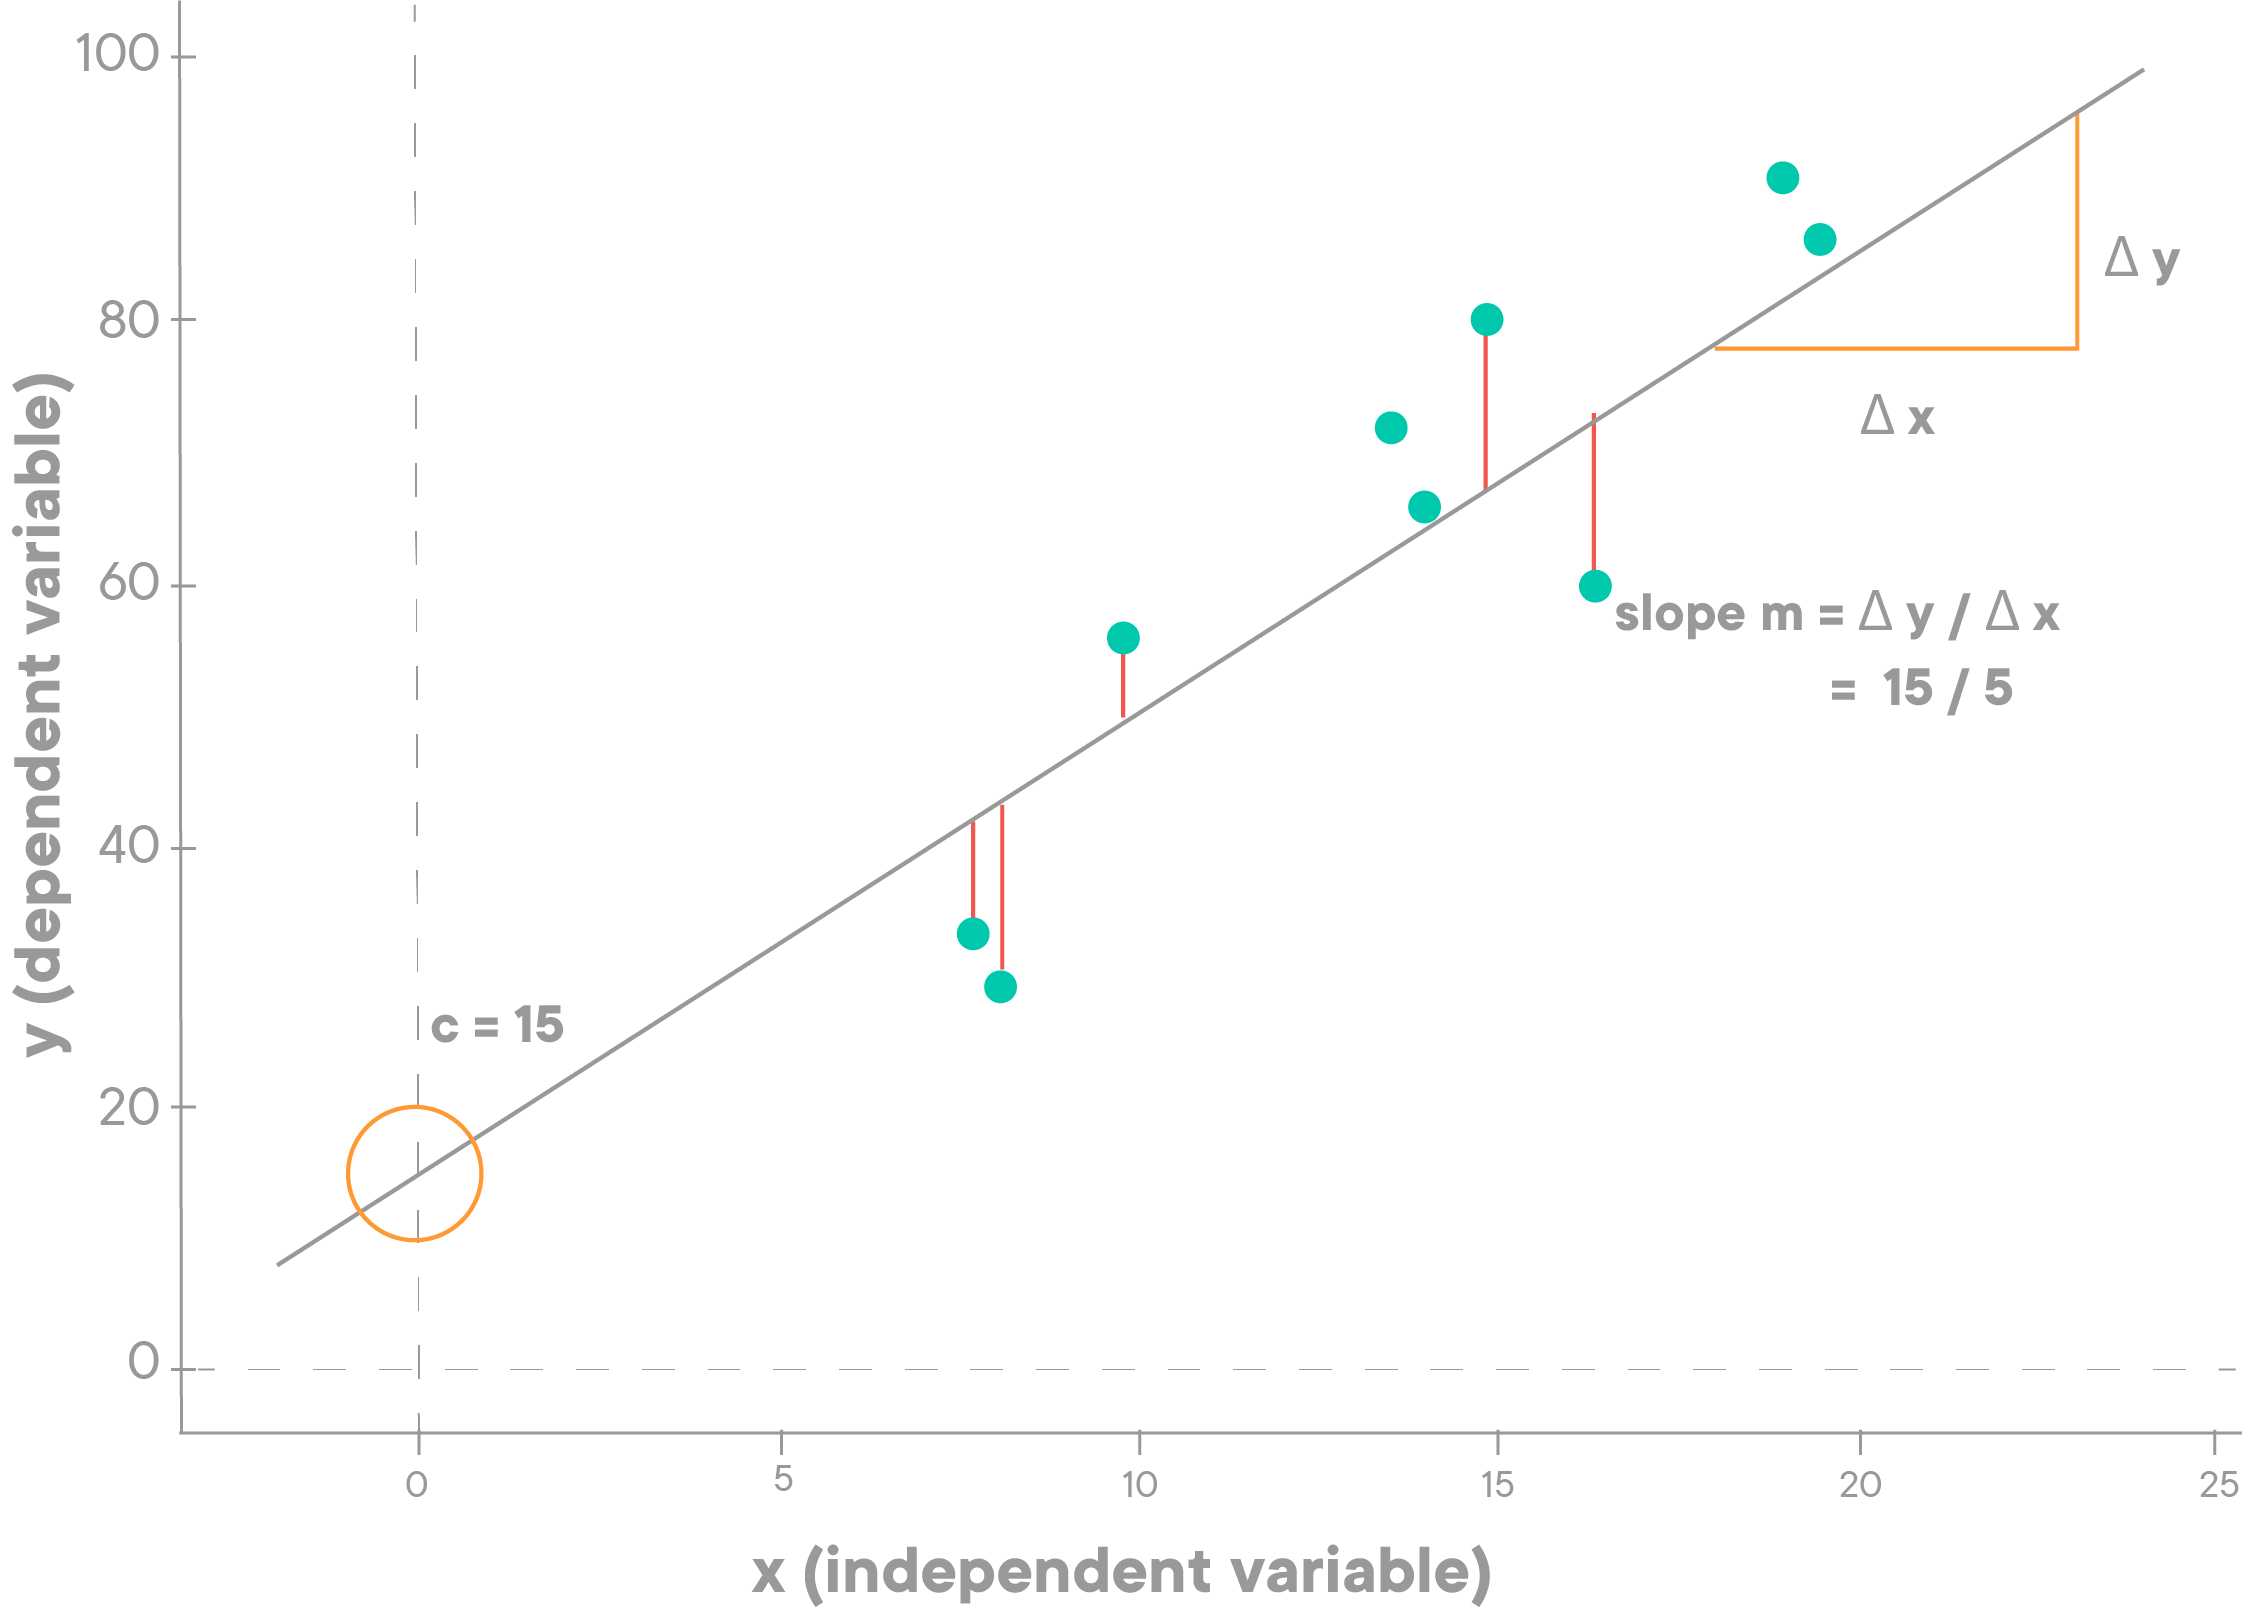

In our example:

$c$ is equal to 15, which is where our line intersects with the y-axis.

$m$ is equal to 3, which is our slope.

You can find a slope by taking an arbitrary part of the line, looking at the differences for the x-value and the y-value for that part of the line, and dividing $\Delta y$ by $\Delta x$. In other words, you can look at the **change in y over the change in x** to find the slope!

### Important note on notation

Now that you know how the slope and intercept define the line, it's time for some more notation.

Looking at the above plots, you know that you have the green dots that are our observations associated with x- and y-values.

Now, when we draw our regression line based on these few green dots, we use the following notations:

$$\hat{y}=\hat m x+ \hat{c}$$ or $$\hat y = \hat \beta_0+ \hat \beta_1 x $$

As you can see, you're using a "hat" notation which stands for the fact that we are working with **estimations**.
* When trying to draw a "best fit line", you're estimating the most appropriate value possible for your intercept and your slope, hence $\hat{c}$ /$ \hat \beta_0 $ and $\hat{m}$ /$ \hat \beta_1 $.
* Next, when we use our line to predict new values $y$ given $x$, your estimate is an approximation based on our estimated parameter values. Hence we use $\hat y $ instead of $y$. $\hat y$ lies ON your regression line, $y$ is the associated y-value for each of the green dots in the plot above. The error or the vertical offset between the line and the actual observation values is denoted by the red vertical lines in the plot above. Mathematically, the vertical offset can be written as $\mid \hat y - y\mid$.

So how do you find the line with the best fit? You may think that you have to try lots and lots of different lines to see which one fits best. Fortunately, this task is not as complicated as in may seem. Given some data points, the best-fit line always has a distinct slope and y-intercept that can be calculated using simple linear algebraic approaches. Let's quickly visit the required formulas.

### Best-Fit Line Ingredients

Before we calculate the best-fit line, we have to make sure that we have calculated the following measures for variables X and Y:
* The mean of the X $(\bar{X})$
* The mean of the Y $(\bar{Y})$
* The standard deviation of the X values $(S_X)$
* The standard deviation of the y values $(S_Y)$
* The correlation between X and Y ( often denoted by the Greek letter "Rho" or $\rho$ - Pearson Correlation)

### Calculating Slope

With the above ingredients in hand, we can calculate the slope (shown as $b$ below) of the best-fit line, using the formula:

$$\hat m = \rho \frac{S_Y}{S_X}$$

This formula is also known as the **least-squares method**.

[You can visit this Wikipedia link](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line) to get take a look into the math behind the derivation of this formula.

The slope of the best-fit line can be a negative number following a negative correlation. For example, if an increase in police officers is related to a decrease in the number of crimes in a linear fashion, the correlation and hence the slope of the best-fitting line in this particular setting is negative.

### Calculating Intercept

So now that we have the slope value (\hat m), we can put it back into our formula $(\hat y = \hat m x+ \hat c)$ to calculate intercept. The idea is that

$$\bar{Y} = \hat c + \hat m \bar{X}$$ $$ \hat c = \bar{Y} - \hat m\bar{X}$$

Recall that $\bar{X}$ and $\bar{Y}$ are the mean values for variables X and Y. So, in order to calculate the $\hat y$-intercept of the best-fit line, we start by finding the slope of the best-fit line using the above formula. Then to find the $\hat y$-intercept, we multiply the slope value by the mean of x and subtract the result from the mean of y.
Predicting from the model

As mentioned before, when you have a regression line with defined parameters for slope and intercept as calculated above, you can easily predict the $\hat{y}$ (target) value for a new $x$ (feature) value using the estimated parameter values:

$$\hat{y} = \hat mx + \hat c$$

Remember that the difference between y and $\hat{y}$ is that $\hat{y}$ is the value predicted by the fitted model, whereas $y$ carries actual values of the variable (called the truth values) that were used to calculate the best fit.

Next, let's move on and try to code these equations to fit a regression line to a simple dataset to see all of this in action.

# Linear Regressions
1. Import and analyze the data set.
2. Training our model
3. Analyze the results of our model 
4. Make predictions with our model.

### Import and analyze the data set.

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [8]:
df = pd.read_csv('../../datasets/kc_housingdata.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,806800090,20150506T000000,275000.0,3,1.75,1890,5000,1.0,0,0,...,7,1890,0,2003,0,98092,47.3357,-122.175,2960,5421
3682,7228500375,20150210T000000,430000.0,4,2.00,1990,4740,1.0,0,0,...,7,1080,910,1926,0,98122,47.6112,-122.303,1560,2370
3683,2891100820,20140825T000000,213500.0,3,1.00,1220,6000,1.0,0,0,...,7,1220,0,1968,0,98002,47.3245,-122.209,1420,6000
3684,8564850300,20140912T000000,535000.0,3,3.00,2640,5978,2.0,0,0,...,9,2640,0,2012,0,98045,47.4759,-121.735,2680,6060


In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3686 non-null   int64  
 1   date           3686 non-null   object 
 2   price          3686 non-null   float64
 3   bedrooms       3686 non-null   int64  
 4   bathrooms      3686 non-null   float64
 5   sqft_living    3686 non-null   int64  
 6   sqft_lot       3686 non-null   int64  
 7   floors         3686 non-null   float64
 8   waterfront     3686 non-null   int64  
 9   view           3686 non-null   int64  
 10  condition      3686 non-null   int64  
 11  grade          3686 non-null   int64  
 12  sqft_above     3686 non-null   int64  
 13  sqft_basement  3686 non-null   int64  
 14  yr_built       3686 non-null   int64  
 15  yr_renovated   3686 non-null   int64  
 16  zipcode        3686 non-null   int64  
 17  lat            3686 non-null   float64
 18  long    

In [28]:
any([False, True, False])   #python

True

In [29]:
df[df.isna().any(axis=1)]
#df[df.isnull().any(axis=1)]
#could also use isnull(); 
#isna() though covers more missing values -> better to use

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [22]:
df[df["waterfront"] > 0].shape  #only 33 rows are more than 0, have info out of the total

(33, 21)

In [23]:
df[df["view"] > 0].shape

(376, 21)

In [27]:
df[df["grade"] > 0].shape  #might not be useful either, since we will be trying to predict price

(3686, 21)

In [31]:
df[df["yr_renovated"] > 0]   #will drop it

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,...,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,...,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045
103,2450000295,20141007T000000,1088000.0,3,2.50,2920,8113,2.0,0,0,...,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113
115,3626039325,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,...,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,3600057,20150319T000000,402500.0,4,2.00,1650,3504,1.0,0,0,...,7,760,890,1951,2013,98144,47.5803,-122.294,1480,3504
3586,9272200090,20150204T000000,1598890.0,4,4.50,3780,6000,2.0,0,4,...,11,2770,1010,1910,1977,98116,47.5922,-122.388,2660,6000
3615,3426049031,20140617T000000,870000.0,4,4.25,3010,4887,2.0,0,3,...,10,1940,1070,1951,1996,98115,47.6933,-122.272,2540,9375
3631,6116500300,20140910T000000,525000.0,3,1.75,2870,26500,1.5,0,1,...,8,2870,0,1948,1981,98166,47.4485,-122.355,2420,20500


In [34]:
df[df["sqft_basement"] > 0]  #may drop it

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
10,1736800520,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,2391600165,20140617T000000,475000.0,3,2.25,2280,5750,1.0,0,1,...,7,1150,1130,1985,0,98116,47.5641,-122.393,1500,5060
3677,7225000090,20141017T000000,245000.0,2,2.00,1070,4500,1.0,0,0,...,6,910,160,1932,0,98055,47.4896,-122.204,1280,4500
3678,1868901295,20140729T000000,660000.0,5,2.25,2540,3750,1.5,0,0,...,7,1510,1030,1925,0,98115,47.6729,-122.299,1780,3750
3679,6072100490,20141204T000000,527500.0,4,2.25,2270,8480,1.0,0,0,...,8,1310,960,1973,0,98006,47.5448,-122.174,1910,9050


In [ ]:
#will also drop ID

In [36]:
df.drop(columns=['id', 'grade', 'sqft_above', 'waterfront', 'condition', 'view', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], inplace=True)


In [37]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,400,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,910,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...
3681,20150506T000000,275000.0,3,1.75,1890,5000,1.0,0,98092,47.3357,-122.175
3682,20150210T000000,430000.0,4,2.00,1990,4740,1.0,910,98122,47.6112,-122.303
3683,20140825T000000,213500.0,3,1.00,1220,6000,1.0,0,98002,47.3245,-122.209
3684,20140912T000000,535000.0,3,3.00,2640,5978,2.0,0,98045,47.4759,-121.735


In [41]:
df["floors"].value_counts()

1.0    1995
2.0    1252
1.5     356
3.0      51
2.5      31
3.5       1
Name: floors, dtype: int64

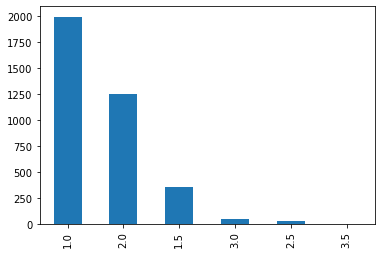

In [40]:
df["floors"].value_counts().plot(kind="bar")

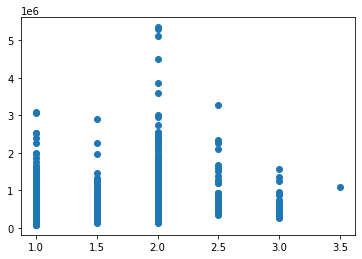

In [42]:
plt.scatter(df["floors"], df['price'])   #the x value is the floor, the y is the price
#2 floor houses sell for more than the 3 floor ones

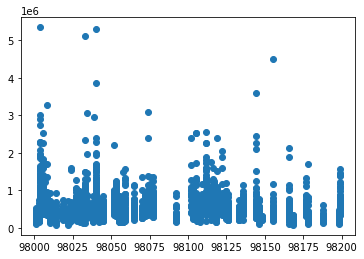

In [43]:
plt.scatter(df["zipcode"], df['price'])   

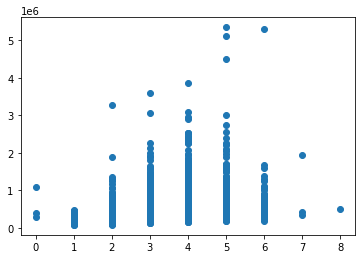

In [44]:
plt.scatter(df["bedrooms"], df['price'])   #5 and 6 bedrooms are most expensive

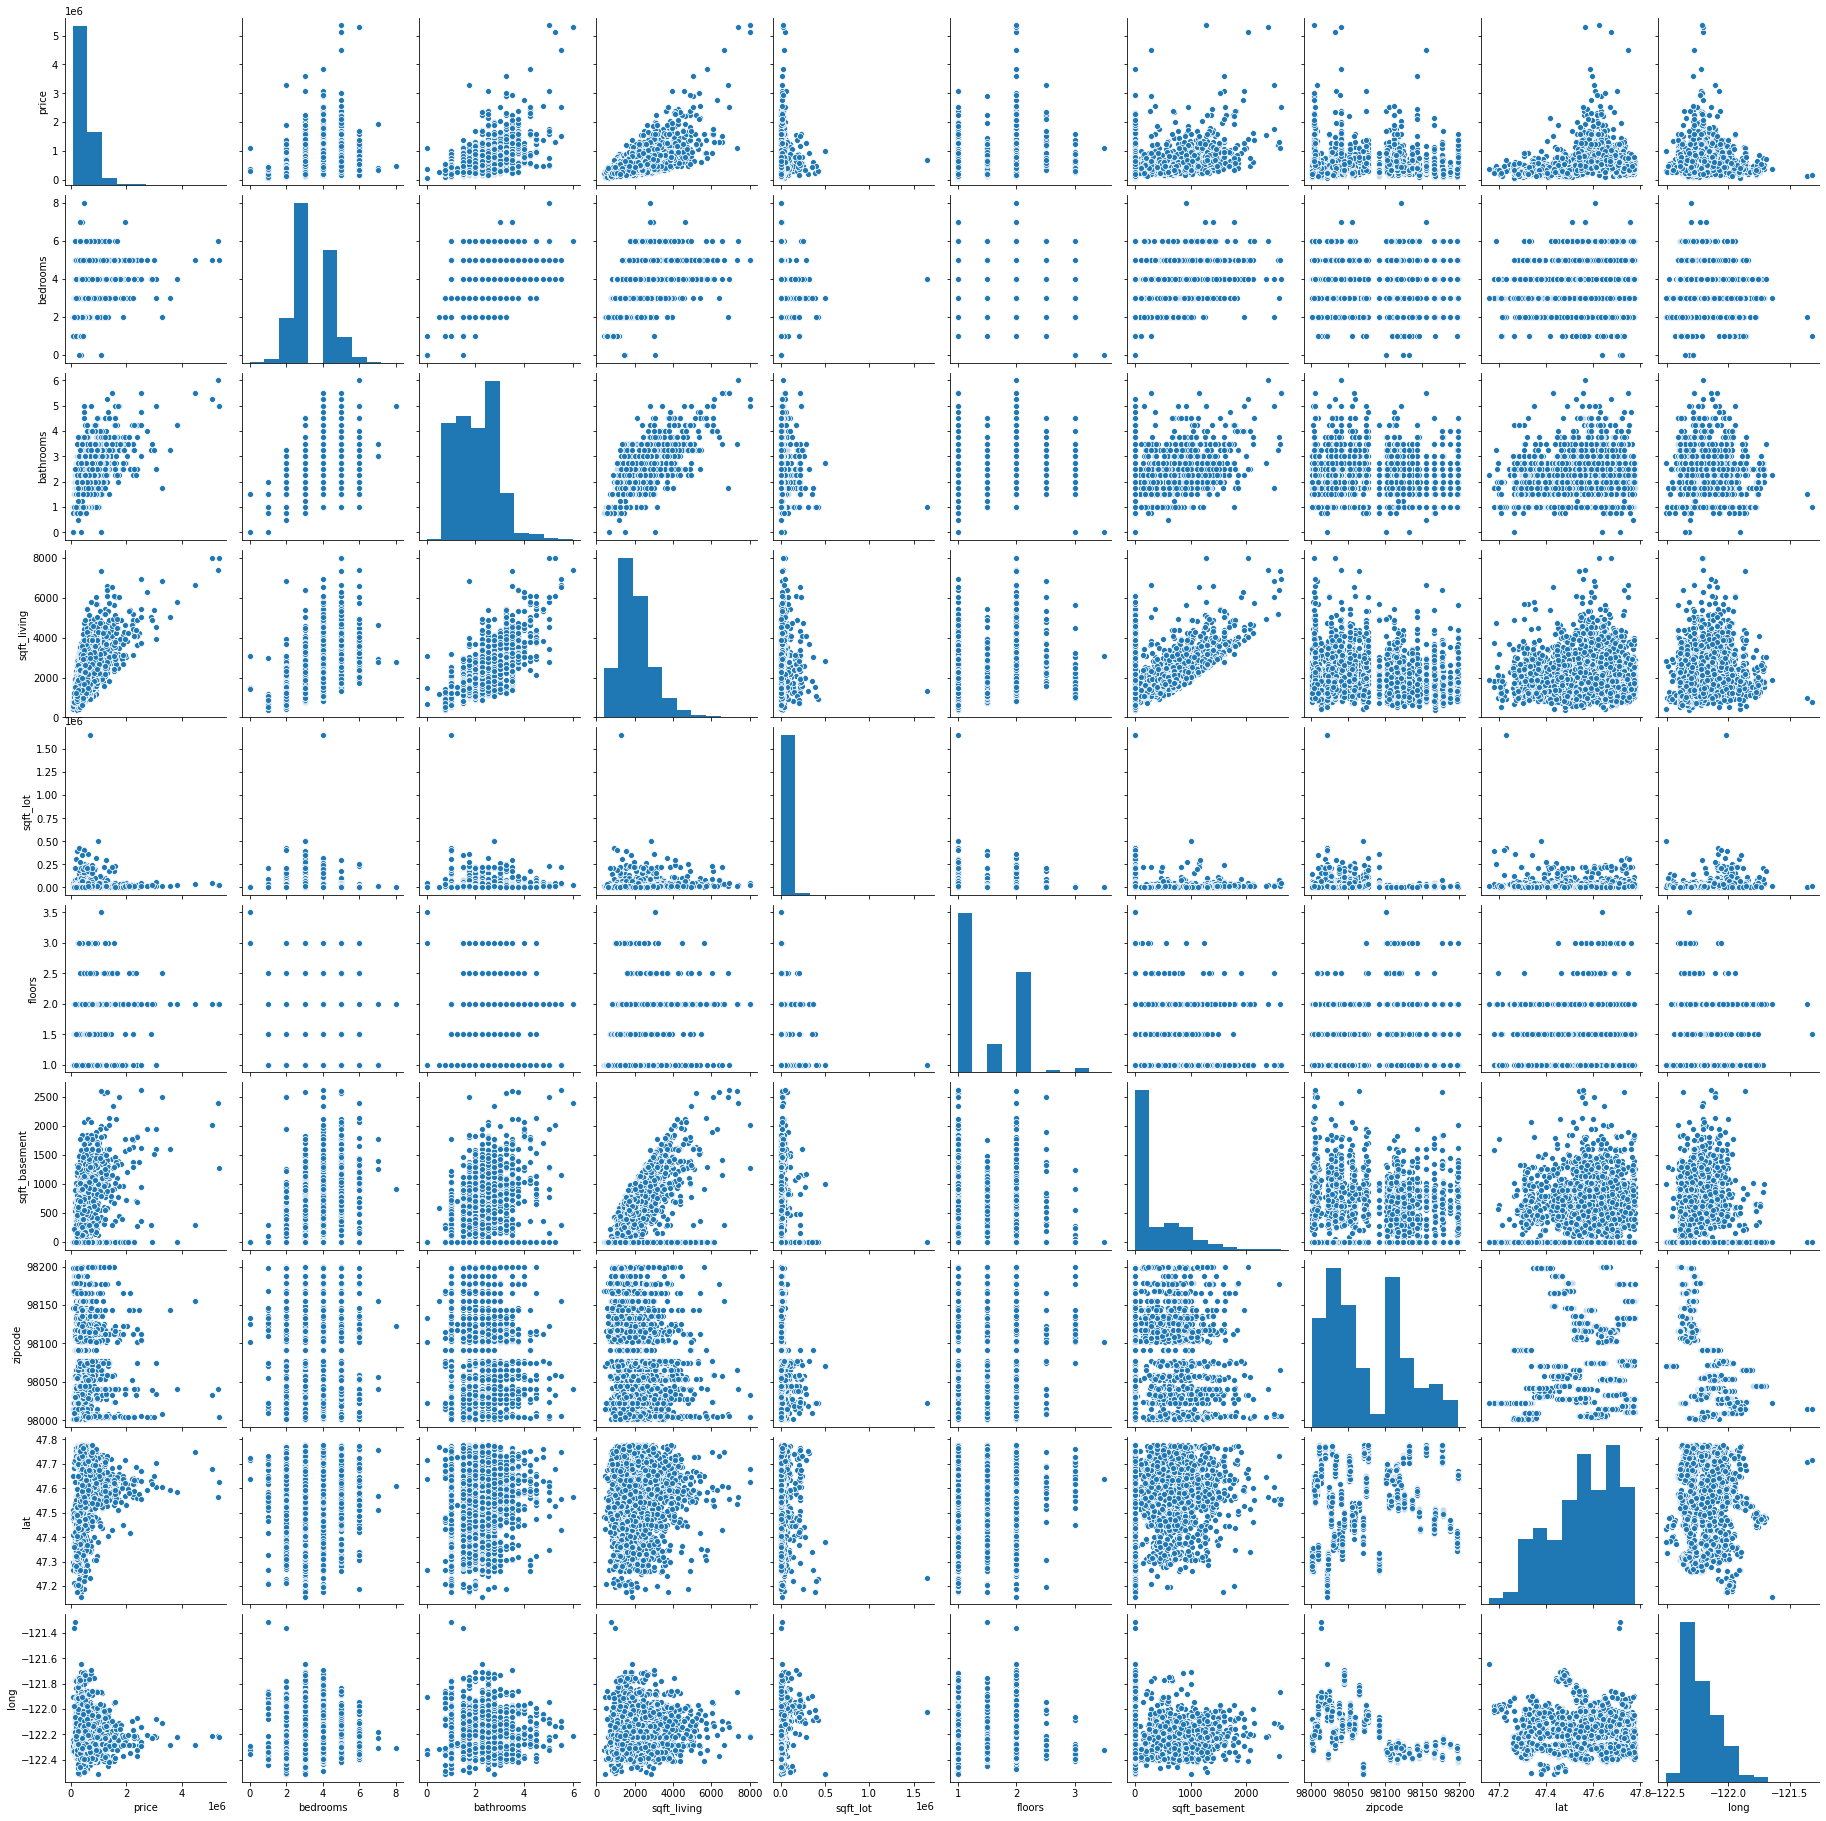

In [45]:
sns.pairplot(df)
plt.show()

<Figure size 360x360 with 0 Axes>

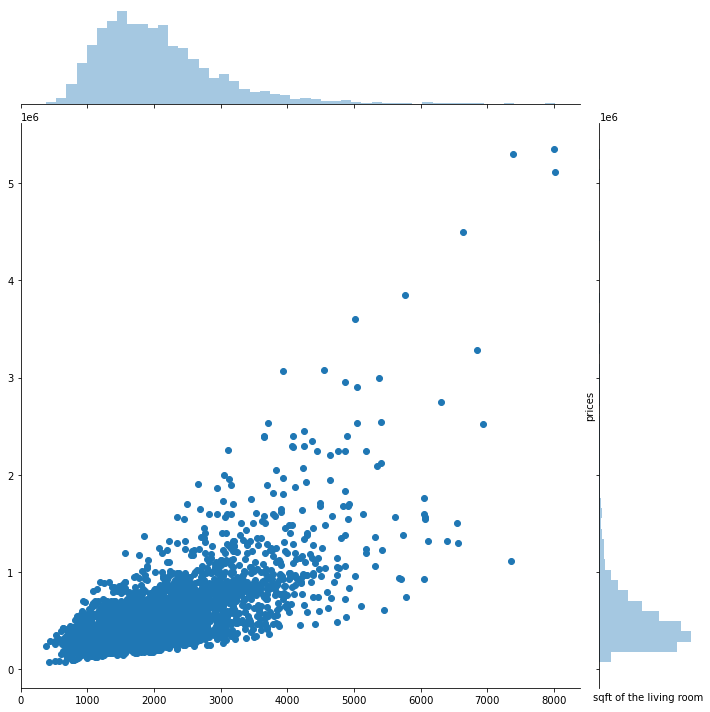

In [46]:
#this looks like a good one for linear regression

plt.figure(figsize=(5,5))
sns.jointplot(x=df["sqft_living"].values, y=df["price"].values, height=10)
plt.ylabel("prices")
plt.xlabel("sqft of the living room")
plt.show()

In [48]:
df.cov()    #finding the covariance beteen the variables

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,zipcode,lat,long
price,1.380502e+11,100848.970089,150343.029659,2.365773e+08,1.165233e+09,51574.627715,5.617715e+07,-1.207405e+06,16025.809821,899.967903
bedrooms,1.008490e+05,0.816308,0.365845,4.731051e+02,9.041221e+02,0.100163,1.286171e+02,-6.727360e+00,0.000335,0.012614
bathrooms,1.503430e+05,0.365845,0.590796,5.329255e+02,1.798691e+03,0.190002,1.064547e+02,-9.034606e+00,0.003182,0.024233
sqft_living,2.365773e+08,473.105089,532.925468,8.320412e+05,4.605906e+06,182.155419,1.901188e+05,-9.716983e+03,9.107560,27.729668
sqft_lot,1.165233e+09,904.122087,1798.691337,4.605906e+06,1.718460e+09,-180.376532,-1.712563e+05,-2.930983e+05,-438.291182,1292.191668
floors,5.157463e+04,0.100163,0.190002,1.821554e+02,-1.803765e+02,0.255869,-5.575816e+01,-2.607381e+00,0.002984,0.012747
sqft_basement,5.617715e+07,128.617096,106.454739,1.901188e+05,-1.712563e+05,-55.758160,2.070032e+05,1.776162e+03,8.327331,-9.913263
zipcode,-1.207405e+06,-6.727360,-9.034606,-9.716983e+03,-2.930983e+05,-2.607381,1.776162e+03,2.944927e+03,1.966769,-4.268121
lat,1.602581e+04,0.000335,0.003182,9.107560e+00,-4.382912e+02,0.002984,8.327331e+00,1.966769e+00,0.019669,-0.002632
long,8.999679e+02,0.012614,0.024233,2.772967e+01,1.292192e+03,0.012747,-9.913263e+00,-4.268121e+00,-0.002632,0.019925


In [49]:
df.corr()   #correlation -> it's in range from (-1 to 1)
#correleation of -1 means that the variables are not correlated at all
#correlation of 1 means that it is 100%

#price has the highest correlation with sqft_living room
#this is sign that we may be able to do a linear regression on it 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,zipcode,lat,long
price,1.000000,0.300418,0.526436,0.698043,0.075653,0.274416,0.332317,-0.059882,0.307547,0.017160
bedrooms,0.300418,1.000000,0.526807,0.574061,0.024140,0.219165,0.312884,-0.137208,0.002644,0.098904
bathrooms,0.526436,0.526807,1.000000,0.760108,0.056451,0.488687,0.304409,-0.216597,0.029520,0.223357
sqft_living,0.698043,0.574061,0.760108,1.000000,0.121807,0.394785,0.458104,-0.196301,0.071193,0.215366
sqft_lot,0.075653,0.024140,0.056451,0.121807,1.000000,-0.008602,-0.009080,-0.130289,-0.075388,0.220832
floors,0.274416,0.219165,0.488687,0.394785,-0.008602,1.000000,-0.242276,-0.094986,0.042056,0.178523
sqft_basement,0.332317,0.312884,0.304409,0.458104,-0.009080,-0.242276,1.000000,0.071938,0.130505,-0.154359
zipcode,-0.059882,-0.137208,-0.216597,-0.196301,-0.130289,-0.094986,0.071938,1.000000,0.258420,-0.557190
lat,0.307547,0.002644,0.029520,0.071193,-0.075388,0.042056,0.130505,0.258420,1.000000,-0.132955
long,0.017160,0.098904,0.223357,0.215366,0.220832,0.178523,-0.154359,-0.557190,-0.132955,1.000000


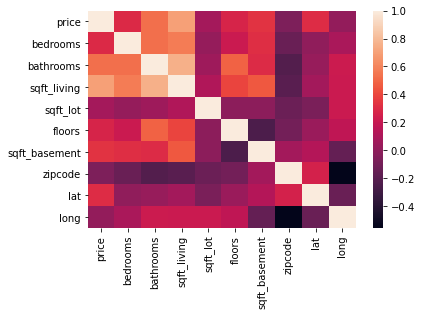

In [50]:
sns.heatmap(df.corr())  #a heatmap representation of the df values correlation

In [ ]:
#now we are ready to train our model

### Training our model

Our X value's going to be the independent variable. 
Our Y value's going to be the dependant variable.

In [52]:
X = df["sqft_living"]
Y = df["price"]   #set the values

In [55]:
#divide the values into training and test data
#divide them 80/20 --> training/test

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)   #20%

In [57]:
X_train.shape, X_test.shape

((2948,), (738,))

In [59]:
X_train

3644    1770
223     2220
2924    1250
1554    2360
3538    1410
        ... 
3475    1090
2810    1680
918     1000
3684    2640
221     1750
Name: sqft_living, Length: 2948, dtype: int64

In [61]:
# y_train.values   -->this is a row/vector
y_train.values.reshape(-1,1)   #reshaping to turn into a column again

array([[600000.],
       [325000.],
       [353000.],
       ...,
       [270000.],
       [535000.],
       [279950.]])

In [63]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))   #fit a line onto our linear regression

LinearRegression()

In [64]:
score = reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

In [67]:
score

0.5313555837257051

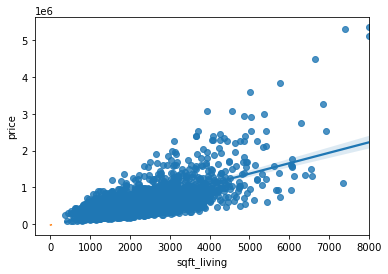

In [68]:
x_line = np.arange(5,25).reshape(-1,1)
sns.regplot(x='sqft_living', y='price', data=df, fit_reg=True)
plt.plot(x_line, reg.predict(x_line))
plt.show()


### Analyzing our results

Some things to note:
* our `score`
* our `fit`
* our chart

First let's discuss the `fit` method. What does it do?

https://miro.medium.com/max/700/1*CjTBNFUEI_IokEOXJ00zKw.gif

Something called [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)

What does the `score` mean?

The score is the $R^{2}$ or the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

What about our chart?

# Making predictions from our results

Can we?